# Final Project 
<br>

The goal of our project is comparing the performances of different classification models on
predicting whether a patient has had a heart attack or will have one in the near future. Among the
models that we have learnt, those that will be used are Decision Tree, KNN, Naive Bayes, MLP and SVM. Besides comparing the performances of each model, we will perform parameter-tuning to discover which values of parameters provide the best results, and why they are the best. The dataset has 918 observations which is the combination of 11 common features from 5 heart datasets.

## Group Members: 
#### Hao Wu, Yiming Yao, Jerry Li, Adrian Jen Ern Koh<br>

## Exploratory Data Analysis 

First of all, we should do some exploration on the data to familiarize ourselves with it.

In [271]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [272]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<br>
Next, we need to check data dimensionality, feature names, and feature types.

In [273]:
print("*****> the dimensionality of the data is", df.shape)
print("")
print("*****> the feature names:")
print(list(df.columns)) 
print("")
print("*****> the data types of the features:")
print(df.info()) 

*****> the dimensionality of the data is (918, 12)

*****> the feature names:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

*****> the data types of the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    in

<br>
Now, we take a look at the basic statistical characteristics of each numerical feature.

In [274]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


As seen above, the feature 'Cholesterol' has zero-values, which is impossible. As a result, we will remove the feature altogether as it could negatively affect our learning experience of the data.

In [275]:
df.drop(['Cholesterol'], axis=1, inplace=True)

In [276]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

For the label 'HeartDisease', 1 represents a person has had heart disease while 0 represents the opposite.<br>
As seen above, the data is skewed towards 'HeartDisease=1'.


Now we need to do some modification on the dataset. For convenience, we will replace the text features with integers. Details are listed below:<br>
1. Sex: <br>
- Male -> 1 <br>
- Female -> 0<br>
2. Resting ECG: <br>
- ST -> 0<br>
- Normal -> 1 <br>
- LVH -> 2<br>
3. ExerciseAngina: <br>
- Y -> 1 <br>
- N -> 0<br>
4. ChestPainType:<br>
- ASY -> 0<br>
- ATA -> 1<br>
- NAP -> 2<br>
- TA -> 3<br>
5. ST_Slope<br>
- Up -> 0<br>
- Flat -> 1<br>
- Down -> 2<br>


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

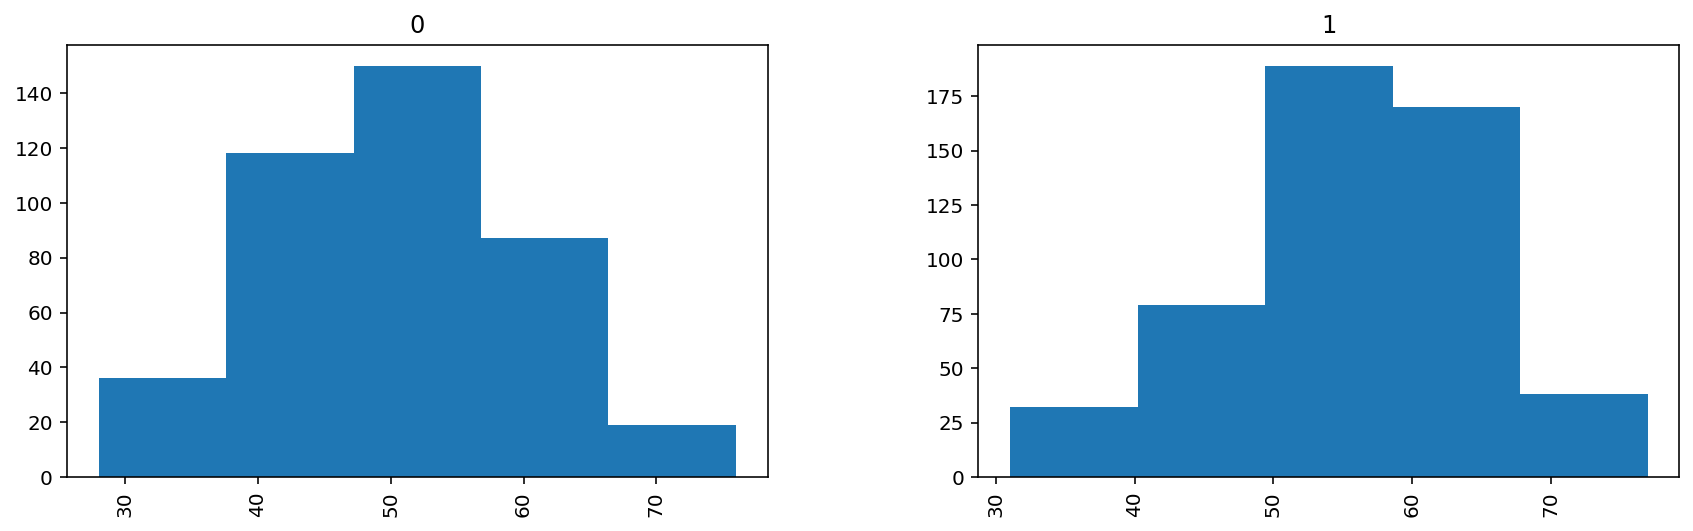

In [277]:
import matplotlib.pyplot as plt

df.hist(column='Age', by='HeartDisease', bins=5,figsize=(14,4))

As seen above, for people who have had heart disease, the group skews towards older ages. For people who do not have heart disease, the group skews towards younger ages.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

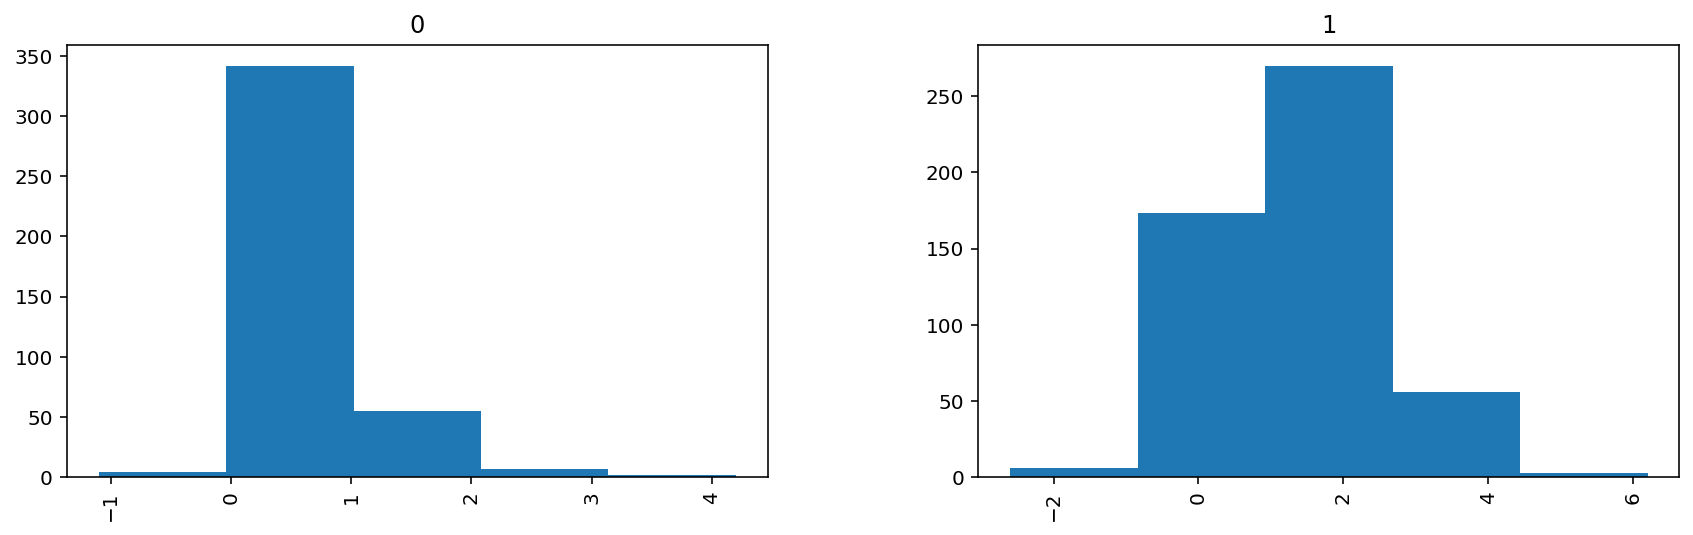

In [278]:
df.hist(column='Oldpeak', by='HeartDisease', bins=5,figsize=(14,4))

<AxesSubplot:xlabel='RestingECG', ylabel='proportion'>

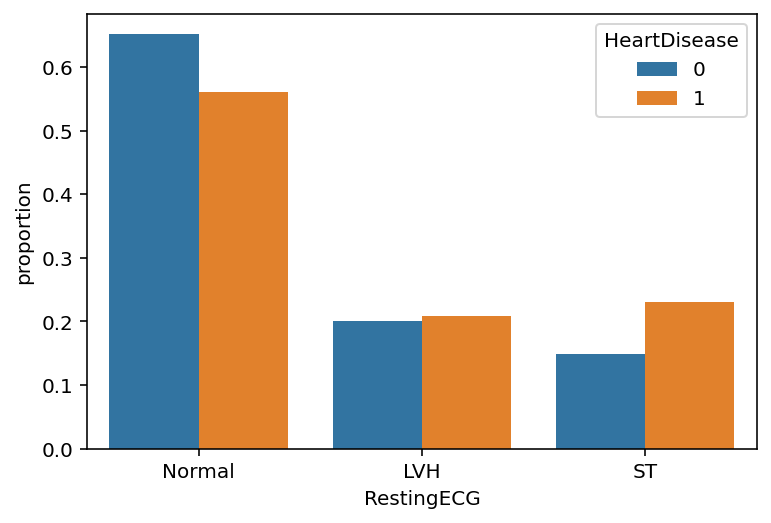

In [279]:
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are sharper and more legible
%config InlineBackend.figure_format = 'retina'

x = 'RestingECG'
y = 'proportion'
hue = 'HeartDisease'
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<AxesSubplot:xlabel='Sex', ylabel='proportion'>

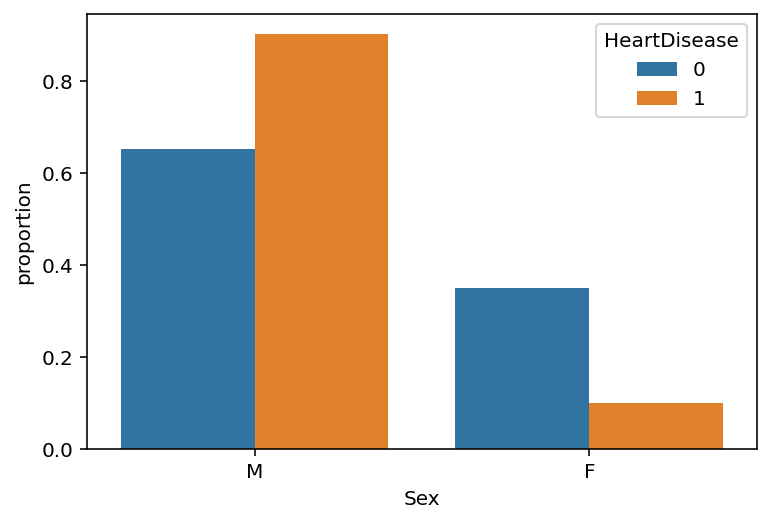

In [280]:
x = 'Sex'
y = 'proportion'
hue = 'HeartDisease'
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<AxesSubplot:xlabel='ChestPainType', ylabel='proportion'>

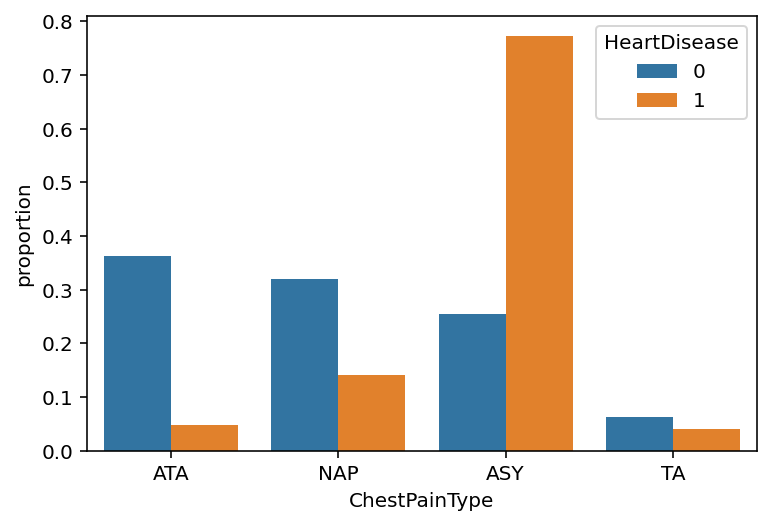

In [281]:
x = 'ChestPainType'
y = 'proportion'
hue = 'HeartDisease'
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

The finding above is surprising as it would generally be assumed that people with heart disease have some type of chest pain. However, the ASY (asymptomatic) group shows that most of the group had heart disease. This could mean that the datasets have a bias towards people with chest pain as we can see that for the other groups of chest pain, the people who do not have heart disease are of higher percentages than those who do.

<AxesSubplot:xlabel='ExerciseAngina', ylabel='proportion'>

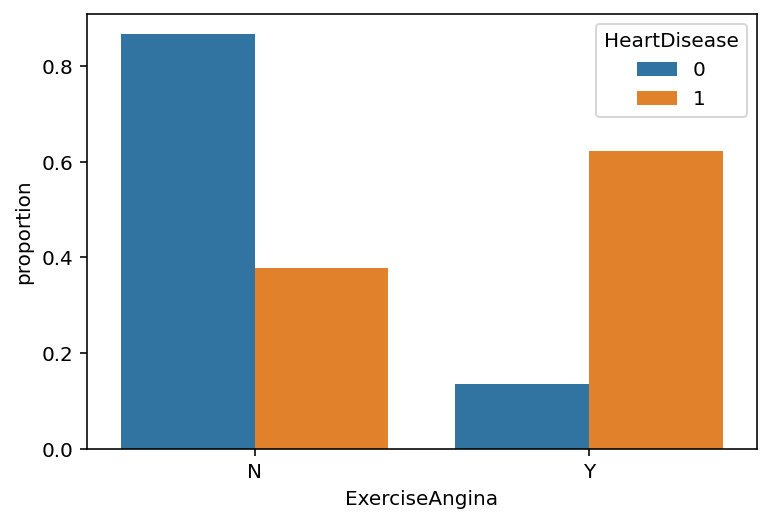

In [282]:
x = 'ExerciseAngina'
y = 'proportion'
hue = 'HeartDisease'
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

As expected, people who have exercise-induced angina have a higher chance of having heart disease.

<AxesSubplot:xlabel='ST_Slope', ylabel='proportion'>

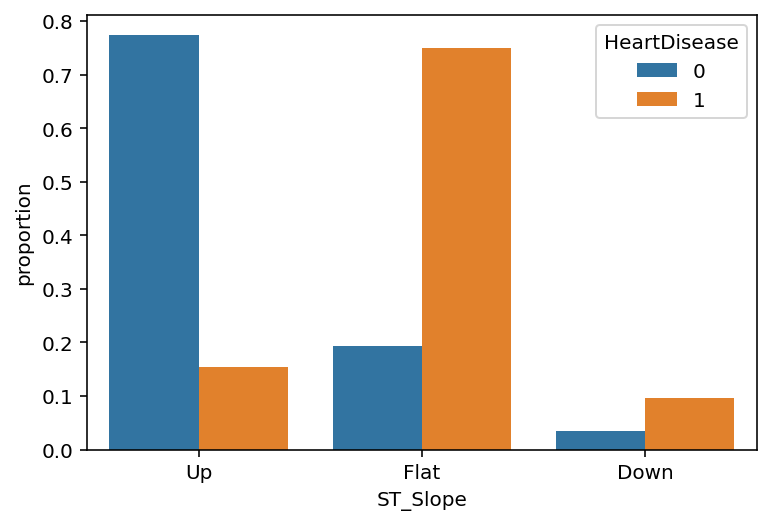

In [283]:
x = 'ST_Slope'
y = 'proportion'
hue = 'HeartDisease'
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

For both 'ST_Slope=Flat' and 'ST_Slope=Down', people who have had heart disease are of the higher percentage than those who don't have heart disease. The opposite can be said for 'ST_Slope=Up'.

<AxesSubplot:xlabel='FastingBS', ylabel='proportion'>

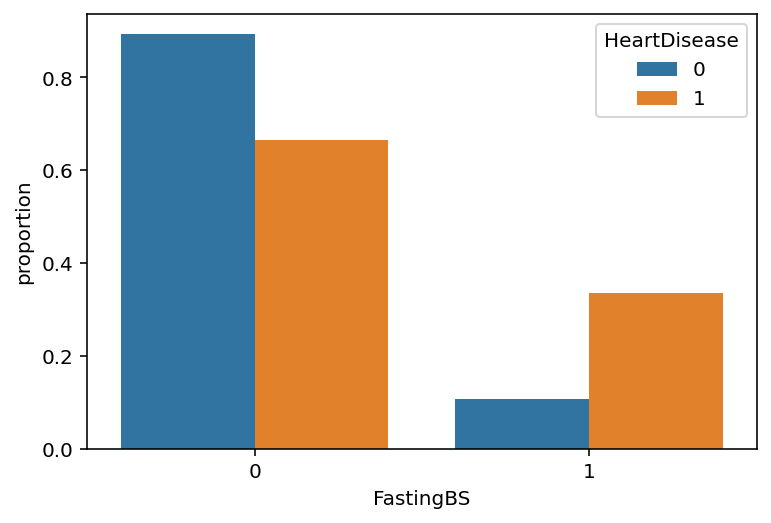

In [284]:
x = 'FastingBS'
y = 'proportion'
hue = 'HeartDisease'
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

For fasting blood sugar, 1 represents FastingBS > 120 mg/dl and 0 indicates otherwise. It can be seen that people with high fasting blood sugar are more prone to have heart disease than those with low fasting blood sugar and vice versa.

In [285]:
df['HeartDisease'] = df['HeartDisease'].astype('int')
y = df['HeartDisease']

# convert to integer features
df['Sex'].replace(['M','F'],[0,1],inplace=True)
df['Sex'] = df['Sex'].astype('int')

df['RestingECG'].replace(['ST','Normal','LVH'],[0,1,2],inplace=True)
df['RestingECG'] = df['RestingECG'].astype('int')

df['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
df['ExerciseAngina'] = df['ExerciseAngina'].astype('int')

df['ChestPainType'].replace(['ASY','ATA','NAP','TA'],[0,1,2,3],inplace=True)
df['ChestPainType'] = df['ChestPainType'].astype('int')

df['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)
df['ST_Slope'] = df['ST_Slope'].astype('int')

# drop HeartDisease as it is the target variable
df.drop(['HeartDisease'], axis=1, inplace=True)

# now we print the head of the data
df.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,1,140,0,1,172,0,0.0,0
1,49,1,2,160,0,1,156,0,1.0,1
2,37,0,1,130,0,0,98,0,0.0,0
3,48,1,0,138,0,1,108,1,1.5,1
4,54,0,2,150,0,1,122,0,0.0,0


In [286]:
# now we print the tail of the data
df.tail()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
913,45,0,3,110,0,1,132,0,1.2,1
914,68,0,0,144,1,1,141,0,3.4,1
915,57,0,0,130,0,1,115,1,1.2,1
916,57,1,1,130,0,2,174,0,0.0,1
917,38,0,2,138,0,1,173,0,0.0,0


# Heart Disease Prediction using 5 different algorithms


## 1. Decision Tree (DT)


The first classifier which will be implemented is Decision Tree (DT).<br>
First, we split the dataset into two parts, the first part
is for training (x_train, y_train) while the second part is for prediction (X_holdout, Y_holdout).<br>
For the setting of the train_test_split(), we set the parameter test_size to 0.2, which means 20% of the
data will be selected randomly to do prediction. And the random_state is set to 20.<br>
Random_state makes sure that data values will be the same for training and testing data sets. It
fixes the order of data for train_test_split().<br>
Then, use DecisionTreeClassifier().fit() to train
our decision tree model with the train data part. 

In [287]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

df_dt = df.copy()

X_train, X_holdout, y_train, y_holdout = train_test_split(df_dt.values, y, test_size=0.2, random_state=20)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

<br>
use the pred() to let the model predict the
result for the test data part. Use accuracy_score() to compare actual result (Y_holdout) and
prediction, then calculate the accuracy of our model. 

In [288]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

tree_pred = tree.predict(X_holdout)
print (f"Accuracy for decision tree is {accuracy_score(y_holdout, tree_pred)}") 

Accuracy for decision tree is 0.7717391304347826


<br>
We identify the best parameters for DT using cross-validation. It computes our model performance with 5-fold cross-validation, and then selects the best parameter values for random_state, max_depth and max_features.

In [289]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(1,20),
               'random_state' : range(1,40)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=False)

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(1, 20),
                         'random_state': range(1, 40)},
             verbose=False)

In [290]:
print (f"Best parameters are {tree_grid.best_params_}") 

tree_grid_pred = tree_grid.predict(X_holdout)
print()
print (f"Accuracy of decision tree before parameter tuning: {accuracy_score(y_holdout, tree_pred)}") 
print (f"Accuracy of decision tree after parameter tuning: {accuracy_score(y_holdout, tree_grid_pred)}") 

Best parameters are {'max_depth': 3, 'max_features': 6, 'random_state': 15}

Accuracy of decision tree before parameter tuning: 0.7717391304347826
Accuracy of decision tree after parameter tuning: 0.8586956521739131


### Conclusion for DT:

As seen above, the performance of decision tree was poor before parameter tuning. After feeding DT into GridSearchCV, its accuracy was successfully increased by around 7-8%.

Here, we evaluates our models with four metrics: accuracy, precision, recall, and F1-score

In [291]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_holdout, tree_grid_pred)))
print('Precision score: {}'.format(precision_score(y_holdout, tree_grid_pred)))
print('Recall score: {}'.format(recall_score(y_holdout, tree_grid_pred)))
print('F1 score: {}'.format(f1_score(y_holdout, tree_grid_pred)))

Accuracy score: 0.8586956521739131
Precision score: 0.8288288288288288
Recall score: 0.9292929292929293
F1 score: 0.8761904761904762


<br>
In the end, we draw the tree that the algorithm generate

In [292]:
# plot function and grid

from sklearn.tree import DecisionTreeClassifier
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

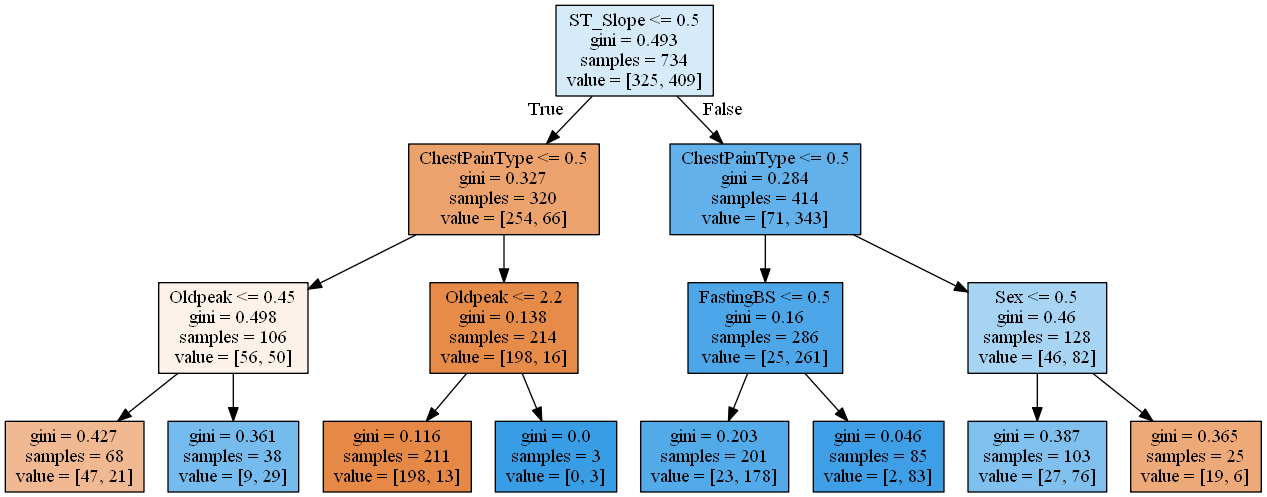

In [293]:
tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=df_dt.columns, png_file_to_save='heart_decision_tree.png')


from IPython.display import Image
from IPython.core.display import HTML 
PATH = "heart_decision_tree.png"
Image(filename = PATH , width=900, height=900)

## 2. k-Nearest Neighbors (kNN)
<br>
In this part, we implement kNN.<br>
Before training the model, we need to scale the features using StandardScaler().<br>
It is used to standardize features by removing the mean and scaling to unit variance.<br>
Then, we will train the model with KNeighborsClassifier.fit().<br>

In [294]:
from sklearn.neighbors import KNeighborsClassifier

df_knn = df.copy()
knn = KNeighborsClassifier()

X_train, X_holdout, y_train, y_holdout = train_test_split(df_knn.values, y, test_size=0.2,random_state=20)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.fit_transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [295]:
knn_pred = knn.predict(X_holdout_scaled)
print (f" Accuracy for k-nn is {accuracy_score(y_holdout, knn_pred)}")

 Accuracy for k-nn is 0.8695652173913043


<br>
Here, we evaluate kNN with four metrics: accuracy, precision, recall, and F1-score

In [296]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_holdout, knn_pred)))
print('Precision score: {}'.format(precision_score(y_holdout, knn_pred)))
print('Recall score: {}'.format(recall_score(y_holdout, knn_pred)))
print('F1 score: {}'.format(f1_score(y_holdout, knn_pred)))

Accuracy score: 0.8695652173913043
Precision score: 0.8865979381443299
Recall score: 0.8686868686868687
F1 score: 0.8775510204081632


<br>
Next, we perform parameter tuning on kNN

In [297]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 20)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=False)
knn_grid.fit(X_train_scaled, y_train)

print (f"Best parameters are {knn_grid.best_params_}") 
knn_grid_pred = knn_grid.predict(X_holdout_scaled)
print()
print (f"Accuracy of kNN before parameter tuning: {accuracy_score(y_holdout, knn_pred)}") 
print (f"Accuracy of kNN after parameter tuning: {accuracy_score(y_holdout, knn_grid_pred)}") 


Best parameters are {'knn__n_neighbors': 16}

Accuracy of kNN before parameter tuning: 0.8695652173913043
Accuracy of kNN after parameter tuning: 0.8532608695652174


### Conclusion for kNN:

It was interesting to see that not only did parameter tuning not improve the performance of kNN, it worsened it. <br>
The default implementation of kNN was better than the best estimator of kNN proposed by GridSearchCV by 1%, in terms of accuracy.<br>

## 3. Naive Bayes (NB)

The next classifier which will be implemented is Naive Bayes.<br>
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.<br>


Like what we did in decision tree and kNN. Firstly,  we need to split the datasets into two parts

In [298]:
from sklearn.model_selection import train_test_split

df_nb = df.copy()
X_train, X_holdout, y_train, y_holdout = train_test_split(df_nb.values, y, test_size=0.2, random_state=20)

<br>
Multinomial Naive Bayes is good at handling discrete features so it is not suitable here because it cannot handle negative values.<br>
Due to that reason, we will implement Gaussian Naive Bayes. Gaussian Naive Bayes is better suited for continuous features as it assumes that the input data has a Gaussian (normal) distribution.<br>


In [299]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
model = naive_bayes.fit(X_train, y_train)

<br>
We use sklearn's naive_bayes method to make predictions on our dataset.

In [300]:
predictions = model.predict(X_holdout)

<br>
Now we calculate the accuracy of the Naive Bayes model.

In [301]:
print (f" Accuracy for Gaussian Naive Bayes is {accuracy_score(y_holdout, predictions)}")

 Accuracy for Gaussian Naive Bayes is 0.8532608695652174


We evaluate Naive Bayes with four metrics: accuracy, precision, recall, and F1-score

In [302]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_holdout, predictions)))
print('Precision score: {}'.format(precision_score(y_holdout, predictions)))
print('Recall score: {}'.format(recall_score(y_holdout, predictions)))
print('F1 score: {}'.format(f1_score(y_holdout, predictions)))

Accuracy score: 0.8532608695652174
Precision score: 0.8673469387755102
Recall score: 0.8585858585858586
F1 score: 0.8629441624365481


## 4. Multi-layer Perceptron (MLP)

<br>
The next classifier we choose to implement is Multi-layer Perceptron (MLP).<br>
Multi-layer Perceptron (MLP) is a supervised learning algorithm.  Given a set of features and a target, it can learn a non-linear function approximator for classification. <br>
Between the input and the output layer, there can be one or more non-linear layers, called hidden layers.<br>
The picture below shows a simple of single layer. 
(from https://scikitlearn.org/stable/modules/neural_networks_supervised.html)

<img src="https://scikit-learn.org/stable/_images/multilayerperceptron_network.png" height = 50%>

In [303]:
from sklearn.model_selection import train_test_split

df_mlp = df.copy()
X_train, X_holdout, y_train, y_holdout = train_test_split(df_mlp.values, y, test_size=0.2, random_state=20)

<br>
Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale the data.<br>
For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have a mean of 0 and a variance of 1.<br>
Note that the same scaling must be applied to the test set for meaningful results. We use StandardScaler for standardization, like we did in kNN. 

In [304]:
# for MLP, we need to scale features
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

clf = MLPClassifier()
MLPmodel = clf.fit(X_train_scaled, y_train)

<br>
We use the trained model to make predictions, and also get its accuracy. 

In [305]:
prediction_mlp = MLPmodel.predict(X_holdout_scaled)

In [306]:
print (f" Accuracy for MLP is {accuracy_score(y_holdout, prediction_mlp)}")

 Accuracy for MLP is 0.8695652173913043


<br>
Evaluate MLP with four metrics: accuracy, precision, recall, and F1-score

In [307]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_holdout, prediction_mlp)))
print('Precision score: {}'.format(precision_score(y_holdout, prediction_mlp)))
print('Recall score: {}'.format(recall_score(y_holdout, prediction_mlp)))
print('F1 score: {}'.format(f1_score(y_holdout, prediction_mlp)))

Accuracy score: 0.8695652173913043
Precision score: 0.8571428571428571
Recall score: 0.9090909090909091
F1 score: 0.8823529411764706


## 5. Support Vector Machines (SVM)

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. <br>
After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.

In [308]:
from sklearn.model_selection import train_test_split

df_svm = df.copy()
X_train, X_holdout, y_train, y_holdout = train_test_split(df_svm.values, y, test_size=0.2, random_state=20)

<br>
We import the SVM module and create support vector classifier object by passing the argument 'kernel' as the linear kernel in SVC() function. <br>
Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers. In this case, we choose linear kernel.

In [309]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)


SVC(kernel='linear')

<br>
Then, we fit our model on the training set using fit() and perform prediction on the test set using predict().

In [310]:
predictions_svm = clf.predict(X_holdout)

In [311]:
print (f" Accuracy for SVM is {accuracy_score(y_holdout, predictions_svm)}")

 Accuracy for SVM is 0.842391304347826


In [312]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_holdout, predictions_svm)))
print('Precision score: {}'.format(precision_score(y_holdout, predictions_svm)))
print('Recall score: {}'.format(recall_score(y_holdout, predictions_svm)))
print('F1 score: {}'.format(f1_score(y_holdout, predictions_svm)))

Accuracy score: 0.842391304347826
Precision score: 0.8431372549019608
Recall score: 0.8686868686868687
F1 score: 0.855721393034826
